# MOwNiT -  Iteracyjne metody rozwiązywania równań różniczkowych liniowych
### Autor: dr Katarzyna Rycerz
Przykład: Temperatura w stanie stacjonarnym 

Obliczyć rozkład temperatury na kwadratowej płytce w układzie o ustalonych temperaturach na brzegach (brzegi mają różną temperaturę)

Rozkład spełnia równanie Laplace'a

$\frac{\partial^2 	T(x,y)}{\partial x^2}+   \frac {\partial^2 	T(x,y)}{\partial y^2}=0$

Tworzymy rozwiązanie początkowe:
- siatka $n\times n$
- ustawiamy temperaturę na brzegach
- w środku, jako początkową wartość "zgadujemy" 0

In [1]:
import numpy as np

np.set_printoptions(precision=6, suppress=True)

def create_initial_solution(n,hot_temp=100,cold_temp=10):
    T=np.zeros((n,n))
    # ustawienie warunków brzegowych
    T[0,:]=hot_temp
    T[-1,:]=hot_temp
    T[:,0]=hot_temp
    T[:,-1]=cold_temp
    return T

In [2]:
create_initial_solution(10)

array([[100., 100., 100., 100., 100., 100., 100., 100., 100.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100.,  10.]])

Metoda Jakobiego, wzór roboczy $$x_i^{(t+1)}=\frac{1}{a_{ii}}[b_i-\sum_{j=1,j\neq i}^{n} a_{ij}x_j^{(t)}]\  ;\  a_{ii} \neq 0, \forall i \in {1,..,n} $$

Dla równania Laplace'a przyjmuje postać:
$$
		  T^{(t+1)}(x_i,y_j)=
	\frac{T^{(t)}(x_{i},y_{j-1})  + T^{(t)}(x_{i-1}, y_j)
	  +T^{(t)}(x_{i+1},y_{j})
	 +T^{(t)}(x_{i},y_{j+1})}{4} 
	 $$

Uwaga: w kodzie poniżej przyjęto kryterium stopu $|| x_{i+1}-x_{i} || $

In [3]:
def jacobi_laplace(T,maxiter=1000,tol=1e-6):
    n = np.shape(T)[0]
    m = np.shape(T)[1]

    #tablica, gdzie będziemy zapisywać nową iterację
    T_next=T.copy()

    for iter in range(maxiter):
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in range(1,n-1):
            for i in range(1,m-1):
                # wzór roboczy
                T_next[i,j] = 0.25 * (T[i-1,j] + T[i+1,j] +  T[i,j-1] + T[i,j+1])
                # największa poprawa w tej iteracji
                delta = max(delta, abs(T_next[i,j] - T[i,j]))
        # Zamiana macierzy bez kopiowania danych
        T, T_next = T_next, T

        # Sprawdzenie warunku zbieżności
        if delta < tol:
            print(f"Zbieżność osiągnięta po {iter} iteracjach")
            return T
    print("Osiągnięto maksymalną liczbę iteracji")
    return T


In [4]:
T=create_initial_solution(10)
solution = jacobi_laplace(T)

print(solution)

Zbieżność osiągnięta po 254 iteracjach
[[100.       100.       100.       100.       100.       100.
  100.       100.       100.        10.      ]
 [100.        98.766164  97.372847  95.630029  93.270063  89.848684
   84.492049  75.157668  56.233832  10.      ]
 [100.        97.69181   95.095195  91.877206  87.601539  81.632625
   72.961844  59.904792  39.777661  10.      ]
 [100.        96.905883  93.438918  89.182065  83.626266  76.118435
   65.817911  51.721997  32.972021  10.      ]
 [100.        96.492804  92.572531  87.785873  81.603026  73.396943
   62.469372  48.193265  30.388428  10.      ]
 [100.        96.492804  92.572531  87.785873  81.603026  73.396943
   62.469372  48.193265  30.388428  10.      ]
 [100.        96.905883  93.438918  89.182065  83.626266  76.118435
   65.817911  51.721997  32.972021  10.      ]
 [100.        97.69181   95.095195  91.877206  87.601539  81.632625
   72.961844  59.904792  39.777661  10.      ]
 [100.        98.766164  97.372847  95.630029  

## Zadanie 1. (3 pkt)
Bazując na kodzie metody Jacobiego oraz materiale z wykładu napisz implementacje metod:
* Gaussa-Seidla 
* SOR z $\omega_{opt} $ z wykładu czyli
    $\omega_{opt}=\frac{2}{1+\sqrt{1-\rho(M_{GS})}}$
gdzie $\rho(M_{GS})=cos^2(\frac{\pi}{N})$ 
* Czebyszewa z wykładu

<b>UWAGA:</b>
* W celu porównania metod należy wybrać jeden (ujednolicić) warunek stopu !
     * w tym notebooku pokazany jest przykład kryterium stopu $|| x^{(i+1)}-x^{(i)} ||< \text{tol} $ z  normą maksymalną,
     * na wykładzie w pseudokodzie metody Czebyszewa  jest przykład kryterium $\frac{|| A x^{(i)}-b ||}{||b||}< \text{tol}$ bazującego na  normie euklidesowej (suma kwadratów odległosci).
* W przypadku metody Czebyszewa i przeglądania siadki "odd-even" należy poprawnie policzyć liczbę iteracji (1 iteracja = przejscie "odd" + przejscie "even")

In [5]:
def gauss_seidel(T,maxiter=1000,tol=1e-6):
    n = np.shape(T)[0]
    m = np.shape(T)[1]

    max_deltas = []

    for iter in range(maxiter):
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in range(1,n-1):
            for i in range(1,m-1):
                prev_t = T[i, j]
                # wzór roboczy
                T[i,j] = 0.25 * (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1])
                # największa poprawa w tej iteracji
                delta = max(delta, abs(T[i,j] - prev_t))

        max_deltas.append(delta)

        # Sprawdzenie warunku zbieżności
        if delta < tol:
            break
    return T, iter, max_deltas

In [6]:
T = create_initial_solution(10)
solution, iter, _ = gauss_seidel(T)

print(f"Convergence achived after {iter} iterations")
print(solution)

Convergence achived after 133 iterations
[[100.       100.       100.       100.       100.       100.
  100.       100.       100.        10.      ]
 [100.        98.766165  97.372848  95.63003   93.270065  89.848686
   84.492051  75.15767   56.233833  10.      ]
 [100.        97.691811  95.095197  91.87721   87.601544  81.63263
   72.961848  59.904796  39.777663  10.      ]
 [100.        96.905885  93.438922  89.18207   83.626272  76.118443
   65.817918  51.722002  32.972024  10.      ]
 [100.        96.492806  92.572535  87.785879  81.603034  73.396952
   62.46938   48.193271  30.388432  10.      ]
 [100.        96.492807  92.572536  87.78588   81.603035  73.396952
   62.46938   48.193271  30.388432  10.      ]
 [100.        96.905885  93.438922  89.182072  83.626273  76.118444
   65.817919  51.722003  32.972024  10.      ]
 [100.        97.691812  95.095199  91.877212  87.601545  81.632631
   72.961849  59.904796  39.777664  10.      ]
 [100.        98.766165  97.372849  95.630031 

In [7]:
def sor(T: np.ndarray, maxiter=1000, tol=1e-6):
    n, m = T.shape
    ro_mgs = np.cos(np.pi / n) ** 2
    omega_opt = 2 / (1 + np.sqrt(1 - ro_mgs))
    max_deltas = []

    for iter in range(maxiter):
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in range(1,n-1):
            for i in range(1,m-1):
                # wzór roboczy
                prev_t = T[i, j]
                gauss_improvement = 0.25 * (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1])
                T[i, j] = (1 - omega_opt) * T[i, j] + omega_opt * gauss_improvement
                # największa poprawa w tej iteracji
                delta = max(delta, abs(T[i,j] - prev_t))

        max_deltas.append(delta)

        # Sprawdzenie warunku zbieżności
        if delta < tol:
            break

    return T, iter, max_deltas

In [8]:
T = create_initial_solution(10)
solution, iter, _ = sor(T)

print(f"Convergence achived after {iter} iterations")
print(solution)

Convergence achived after 34 iterations
[[100.       100.       100.       100.       100.       100.
  100.       100.       100.        10.      ]
 [100.        98.766166  97.37285   95.630033  93.270068  89.848689
   84.492053  75.157671  56.233834  10.      ]
 [100.        97.691814  95.095202  91.877215  87.601549  81.632635
   72.961853  59.904799  39.777665  10.      ]
 [100.        96.905888  93.438927  89.182077  83.626279  76.118449
   65.817923  51.722006  32.972026  10.      ]
 [100.        96.49281   92.572541  87.785886  81.603041  73.396959
   62.469386  48.193275  30.388434  10.      ]
 [100.        96.492809  92.572541  87.785886  81.603041  73.396959
   62.469386  48.193275  30.388434  10.      ]
 [100.        96.905887  93.438927  89.182077  83.626279  76.118449
   65.817923  51.722006  32.972026  10.      ]
 [100.        97.691814  95.095201  91.877215  87.601549  81.632635
   72.961852  59.904799  39.777665  10.      ]
 [100.        98.766166  97.37285   95.630033 

In [9]:
def chebyshev(T: np.ndarray, maxiter=1000,tol=1e-6):
    n, m = T.shape
    ro_mgs = np.cos(np.pi / n) ** 2
    omega = 1
    max_deltas = []

    for iter in range(maxiter):
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in range(1,n-1):
            for i in range(1 + (j - 1) % 2, m-1, 2):
                # wzór roboczy
                prev_t = T[i, j]
                residual = T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1] - 4 * T[i, j]
                T[i, j] += 0.25 * omega * residual
                # największa poprawa w tej iteracji
                delta = max(delta, abs(T[i,j] - prev_t))

        for j in range(1,n-1):
            for i in range(1 + j % 2, m-1, 2):
                # wzór roboczy
                prev_t = T[i, j]
                residual = T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1] - 4 * T[i, j]
                T[i, j] += 0.25 * omega * residual
                # największa poprawa w tej iteracji
                delta = max(delta, abs(T[i,j] - prev_t))

        max_deltas.append(delta)

        omega = 1 / (1  - 0.25 * omega * ro_mgs ** 2)

        # Sprawdzenie warunku zbieżności
        if delta < tol:
            break

    return T, iter, max_deltas

In [10]:
T = create_initial_solution(10)
solution, iter, _ = chebyshev(T)

print(f"Convergence achived after {iter} iterations")
print(solution)

Convergence achived after 52 iterations
[[100.       100.       100.       100.       100.       100.
  100.       100.       100.        10.      ]
 [100.        98.766166  97.37285   95.630033  93.270067  89.848688
   84.492053  75.157671  56.233834  10.      ]
 [100.        97.691813  95.095201  91.877214  87.601548  81.632634
   72.961852  59.904798  39.777664  10.      ]
 [100.        96.905887  93.438926  89.182076  83.626278  76.118447
   65.817922  51.722005  32.972026  10.      ]
 [100.        96.492809  92.57254   87.785885  81.60304   73.396957
   62.469384  48.193274  30.388433  10.      ]
 [100.        96.492809  92.57254   87.785885  81.60304   73.396957
   62.469384  48.193274  30.388433  10.      ]
 [100.        96.905887  93.438926  89.182076  83.626278  76.118448
   65.817922  51.722005  32.972025  10.      ]
 [100.        97.691813  95.095201  91.877214  87.601548  81.632634
   72.961852  59.904798  39.777664  10.      ]
 [100.        98.766166  97.37285   95.630033 

## Zadanie 2 (0.5 pkt)
Dla ustalonego progu błędu porównaj liczbę iteracji każdej metody potrzebną do osiągnięcia zbieżności dla coraz większych rozmiarów problemu. Wyniki przedstaw na wykresie.

In [11]:
import matplotlib.pyplot as plt

In [12]:
ns = np.linspace(1, 25, 10)
ns = np.int16(ns)
tol = 1e-6
itterrations_gauss = np.array(list(gauss_seidel(create_initial_solution(n), tol = tol)[1] for n in ns))
itterrations_sor = np.array(list(sor(create_initial_solution(n), tol = tol)[1] for n in ns))
itterrations_chebyshev = np.array(list(chebyshev(create_initial_solution(n), tol = tol)[1] for n in ns))

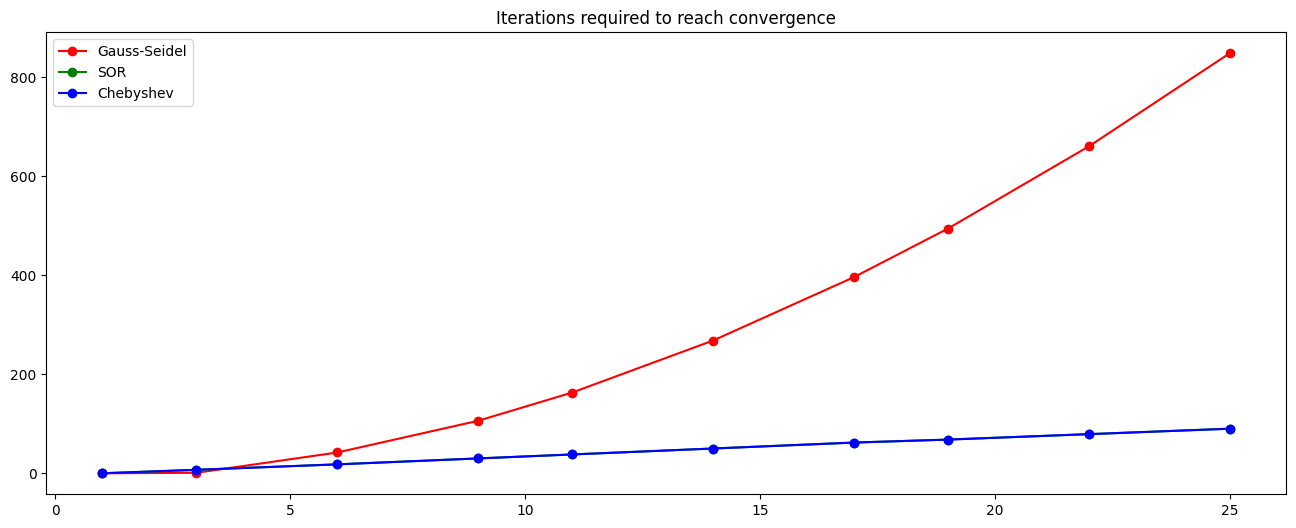

In [13]:
plt.figure(figsize=(16, 6))
plt.title("Iterations required to reach convergence")
plt.plot(ns, itterrations_gauss, c = 'red', marker = 'o', label = "Gauss-Seidel")
plt.plot(ns, itterrations_sor, c = 'green', marker = 'o', label = "SOR")
plt.plot(ns, itterrations_sor, c = 'blue', marker = 'o', label = "Chebyshev")
plt.legend()
plt.show()

## Zadanie 3 (0.5 pkt)
Dla rozmiaru powyżej 120 pkt porównaj na jednym wykresie wartość maksymalnego błedu w danej iteracji w stosunku do błedu poczatkowego, w zależności od iteracji, dla każdej z metod. Błąd należy oszacować względem <b>otrzymanego ostatecznego rozwiązania </b> np. pod warunkiem osiągnięcia zbieżności - w taki sposób $$\epsilon(\text{iter})=\frac{\sum_{i=\text{iter}}^{\text{maxiter}}\max(\delta)}{\sum_{i=1}^{maxiter} \max(\delta)}$$

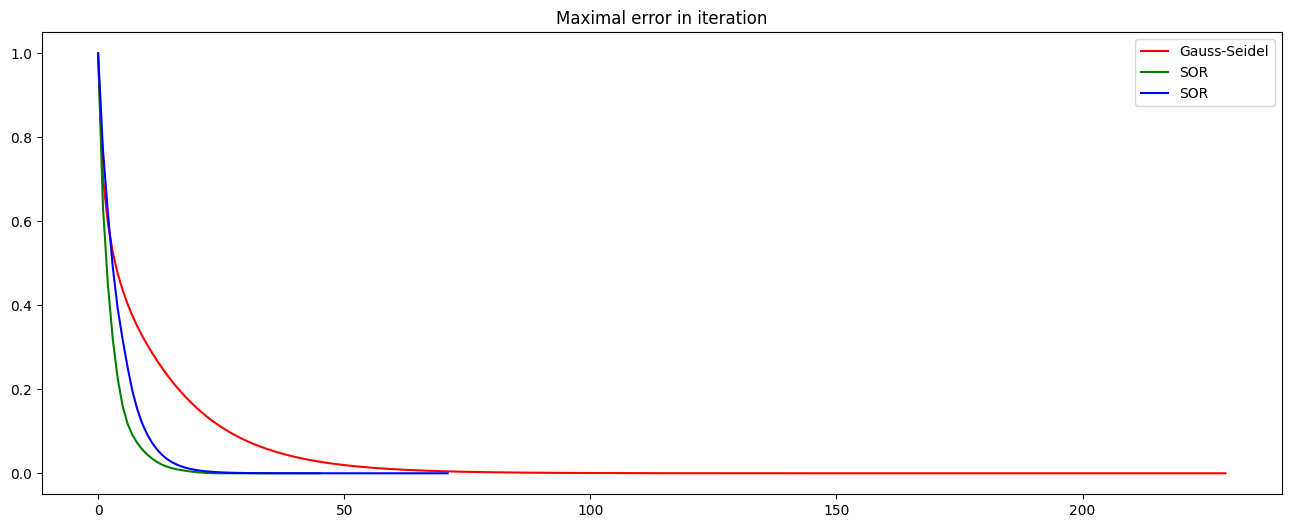

In [14]:
n = 13
T = create_initial_solution(n)
_, maxiter, deltas = gauss_seidel(T)

deltas = np.array(deltas)
denom = np.sum(deltas)
eps = np.array([np.sum(deltas[iter:]) for iter in range(maxiter)]) / denom

plt.figure(figsize=(16, 6))
plt.plot(range(maxiter), eps, c = 'red', label = 'Gauss-Seidel')

T = create_initial_solution(n)
_, maxiter, deltas = sor(T)

deltas = np.array(deltas)
denom = np.sum(deltas)
eps = np.array([np.sum(deltas[iter:]) for iter in range(maxiter)]) / denom

plt.plot(range(maxiter), eps, c = 'green', label = 'SOR')

T = create_initial_solution(n)
_, maxiter, deltas = chebyshev(T)

deltas = np.array(deltas)
denom = np.sum(deltas)
eps = np.array([np.sum(deltas[iter:]) for iter in range(maxiter)]) / denom

plt.plot(range(maxiter), eps, c = 'blue', label = 'SOR')

plt.title("Maximal error in iteration")
plt.legend()
plt.show()

## Zadanie 4 (1 pkt)
Membrana w kształcie kwadratu jest równomiernie obciążona. Membrana znajduje sie w stanie statycznym, a jej brzeg jest sztywno zamocowany i nieodkształcony.

Za pomocą wybranej metody z zadania 1 należy obliczyc odkształcenie membrany od poziomu, zakładając
ze spełnia ono równanie Poissona:

$\frac{\delta^{2}h}{\delta x^{2}}+\frac{\delta^{2}h}{\delta y^{2}}=-p/T$

gdzie mamy ustalone parametry:
- $p>0$ cisnienie wywierane na membrane.
- $T$-napiecie membrany

Poza wypisaniem wartości liczbowych, należy użyć wybranej przez siebie metody wizualizacji wyników. 

In [15]:
def gauss_seidel_membrane(grid, p, T, h=1, maxiter=1000,tol=1e-6):
    n = np.shape(grid)[0]
    m = np.shape(grid)[1]

    b_factor = (p / T) * h ** 2

    for iter in range(maxiter):
        delta = 0.0
        for j in range(1,n-1):
            for i in range(1,m-1):
                prev_t = grid[i, j]
                grid[i,j] = 0.25 * (grid[i-1,j] + grid[i+1,j] + grid[i,j-1] + grid[i,j+1] + b_factor)
                delta = max(delta, abs(grid[i,j] - prev_t))

        # Sprawdzenie warunku zbieżności
        if delta < tol:
            break
    return grid

In [16]:
n = 20
p = 1000
T = 300
grid = create_initial_solution(n, hot_temp = 100, cold_temp = 100)
grid = gauss_seidel_membrane(grid, p, T, h = 1)

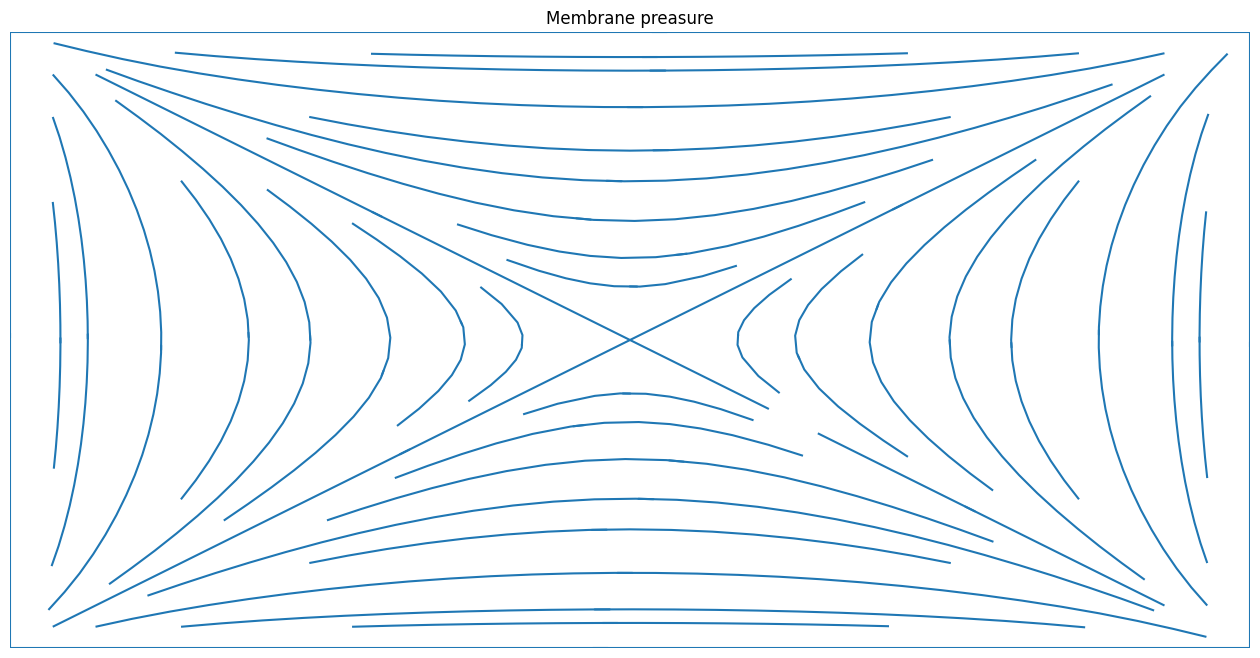

In [17]:
n, m = grid.shape
X, Y = np.arange(n), np.arange(m)
X, Y = np.meshgrid(X, Y)

plt.figure(figsize=(16,8))
plt.title("Membrane preasure")
plt.grid(False)
plt.axis('off')
U, V = np.gradient(grid)
plt.streamplot(X, Y, U, V, arrowstyle='-')
plt.show()
